In [288]:
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#Read the City and Ride Data
citydf = pd.read_csv(city_data_to_load)
ridedf = pd.read_csv(ride_data_to_load)
#Combine the data into a single dataset
pyber = pd.merge(citydf, ridedf, on="city")
pyber = pyber[["city","date","fare","ride_id","driver_count","type"]]
pyber.sort_values(by=['fare'], ascending=False).head()

ridecount = pyber.groupby("city").count()
fareavg = pyber.groupby("city").mean()
drivercount = pyber[["city","driver_count"]]

merged = pd.merge(ridecount, fareavg, left_index=True, right_index=True)
merged = merged[["driver_count_x","fare_y","ride_id_y"]]
drivercount = citydf.set_index("city")
fnlmerged = pd.merge(merged, drivercount, left_index=True, right_index=True)
fnlmerged = fnlmerged.rename(columns={"driver_count_x":"Ride Count",
                             "fare_y":"Average Fare",
                             "ride_id_y":"Ride ID",
                             "driver_count":"Driver Count",          
                             "type":"Type"
                             })
fnlmerged.head()

,Ride Count,Average Fare,Ride ID,Driver Count,Type
city,,,,,
Amandaburgh,18,24.641667,5.359336e+12,12,Urban
Barajasview,22,25.332273,4.676968e+12,26,Urban
Barronchester,16,36.422500,4.460796e+12,11,Suburban
Bethanyland,18,32.956111,5.842550e+12,22,Suburban
Bradshawfurt,10,40.064000,3.735294e+12,7,Rural


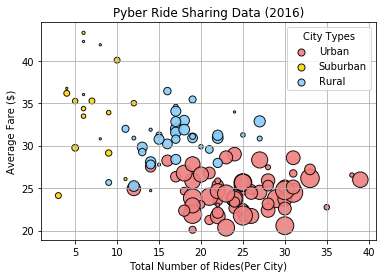

In [291]:
# Obtain the x and y coordinates for each of the three city types
urbandf = fnlmerged[fnlmerged["Type"] == "Urban"]
ruraldf = fnlmerged[fnlmerged["Type"] == "Rural"]
subdf = fnlmerged[fnlmerged["Type"] == "Suburban"]

plt.scatter(x=urbandf["Ride Count"], y=urbandf["Average Fare"], s=urbandf["Driver Count"]*5, c="lightcoral", edgecolor='black', linewidths=1, alpha=.9)
plt.scatter(x=ruraldf["Ride Count"], y=ruraldf["Average Fare"], s=ruraldf["Driver Count"]*5, c="gold", edgecolor='black', linewidths=1, alpha=.9)
plt.scatter(x=subdf["Ride Count"], y=subdf["Average Fare"], s=subdf["Driver Count"]*5, c="lightskyblue", edgecolor='black', linewidths=1, alpha=.9)

plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
lgd = plt.legend(labels=["Urban", "Suburban","Rural"], loc="best", title="City Types")

for lh in lgd.legendHandles: 
    lh._sizes = [50] 

plt.grid()
plt.savefig("Images/PyberRideSharingData2016.png")
plt.show()
# Save Figure

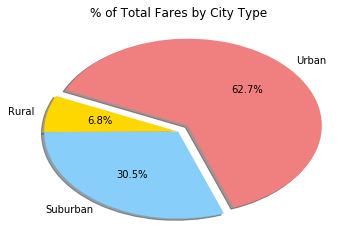

In [284]:
#Total Fares by City Type
urbandf = pyber[pyber["type"] == "Urban"]
ruraldf = pyber[pyber["type"] == "Rural"]
subdf = pyber[pyber["type"] == "Suburban"]
urbc = urbandf["fare"].sum()
rurc = ruraldf["fare"].sum()
subc = subdf["fare"].sum()

totaldf = float(urbc + rurc + subc)

urbp = urbc / totaldf
rurcp = rurc / totaldf
subp = float(subc / totaldf)
explode=(0.1, 0, 0)
labels = ["Urban", "Rural", "Suburban"]
colors =["lightcoral","gold","lightskyblue"]
plt.title("% of Total Fares by City Type")
plt.pie([urbp, rurcp, subp], explode=explode, labels=labels, startangle=290, autopct="%1.1f%%", shadow=True, colors=colors)
plt.savefig("Images/%ofTotalFaresbyCityType.png")
plt.show()

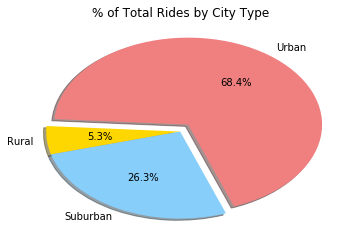

In [285]:
#Total Rides by City Type
urbandf = pyber[pyber["type"] == "Urban"]
ruraldf = pyber[pyber["type"] == "Rural"]
subdf = pyber[pyber["type"] == "Suburban"]
urbc = urbandf["city"].count()
rurc = ruraldf["city"].count()
subc = subdf["city"].count()

totaldf = float(urbc + rurc + subc)

urbp = urbc / totaldf
rurcp = rurc / totaldf
subp = float(subc / totaldf)
explode=(0.1, 0, 0)
labels = ["Urban", "Rural", "Suburban"]
colors =["lightcoral","gold","lightskyblue"]
plt.title("% of Total Rides by City Type")
plt.pie([urbp, rurcp, subp], explode=explode, labels=labels, startangle=290, autopct="%1.1f%%", shadow=True, colors=colors)
plt.savefig("Images/%ofTotalRidesbyCityType.png")
plt.show()

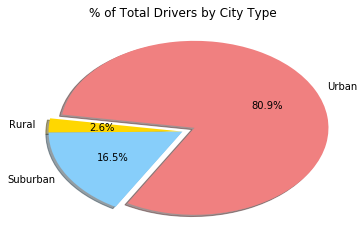

In [286]:
#Total Drivers by City Type
urbandf = citydf[citydf["type"] == "Urban"]
ruraldf = citydf[citydf["type"] == "Rural"]
subdf = citydf[citydf["type"] == "Suburban"]
urbc = urbandf["driver_count"].sum()
rurc = ruraldf["driver_count"].sum()
subc = subdf["driver_count"].sum()

totaldf = float(urbc + rurc + subc)

urbp = urbc / totaldf
rurcp = rurc / totaldf
subp = float(subc / totaldf)
explode=(0.1, 0, 0)
labels = ["Urban", "Rural", "Suburban"]
colors =["lightcoral","gold","lightskyblue"]
plt.title("% of Total Drivers by City Type")
plt.pie([urbp, rurcp, subp], explode=explode, labels=labels, startangle=240, autopct="%1.1f%%", shadow=True, colors=colors)
plt.savefig("Images/%ofTotalDriversbyCityType.png")
plt.show()